In [1]:
from lib.config import Directories
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from lib.matplotlib import Styles, Color

plt.style.use(Styles.CMR10.value)


data = pl.read_csv(
    Directories.EXTERNAL_DATA_DIR.value 
    / "huggingface"
    / "flood-control-projects-visual_2025-11-08.csv", 
    infer_schema_length=10000
    )


2025-11-09 16:04:16.446 | INFO     | lib.matplotlib.color:<module>:104 - Accessible color palette inspired by https://github.com/mpetroff/accessible-color-cycles.


In [2]:
data

GlobalID,InfraYear,Region,Province,Municipality,ImplementingOffice,ProjectID,ProjectDescription,ProjectComponentID,ProjectComponentDescription,Program,TypeofWork,infra_type,Longitude,Latitude,ContractID,ABC,ContractCost,CompletionDateOriginal,CompletionYear,Contractor,ObjectId,CreationDate,Creator,EditDate,Editor,FundingYear,LegislativeDistrict,DistrictEngineeringOffice,ABC_String,ContractCost_String,CompletionDateActual,StartDate,type,slug,_geo
str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,i64,i64,str,i64,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str
"""79e8be69-90ab-488d-bf10-9204d4…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824759LZ""","""Construction of Babuyan River …","""P00824759LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89245,9.99653,"""24EG0058""",1.7963475e7,1.7962e7,1720828800000,2024,"""AZARRAGA CONSTRUCTION""",1,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""17963475""","""17961569.07""","""2024-05-23""","""02/15/2024""","""flood_control""","""construction-of-babuyan-river-…","""[object Object]"""
"""dea02c2f-d69d-4757-8d21-853e00…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824758LZ""","""Construction of Flood Control …","""P00824758LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89251,9.99761,"""24EG0057""",1.737e7,1.7370e7,1721692800000,2024,"""AZARRAGA CONSTRUCTION""",2,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""17370000""","""17369992.99""","""2024-07-19""","""02/23/2024""","""flood_control""","""construction-of-flood-control-…","""[object Object]"""
"""7177ab8b-b330-40f5-bdda-44ce78…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00824750LZ""","""Construction of Babuyan River …","""P00824750LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.89323,9.99671,"""24EG0017""",1.8335e7,1.6803e7,1721779200000,2024,"""F.F. GALANG CONSTRUCTION""",3,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""18335000""","""16802607.63""","""2024-07-24""","""02/23/2024""","""flood_control""","""construction-of-babuyan-river-…","""[object Object]"""
"""fcf681df-bf3b-47a6-8807-01f941…",2023,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Palawan 3rd District Engineeri…","""P00737551LZ""","""Construction of Flood Control …","""P00737551LZ-CW1""","""Construction of Drainage Struc…",null,"""Construction of Drainage Struc…","""Flood Control Structures""",118.899702,10.002658,"""23EG0016""",4.9e6,4.89959e6,1682035200000,2023,"""PALBIC CONSTRUCTION AND SUPPLY""",4,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2023,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Engineeri…","""4900000""","""4899590""","""2023-05-05""","""02/15/2023""","""flood_control""","""construction-of-flood-control-…","""[object Object]"""
"""a3d64d20-0d8d-4b61-abdd-38a3bd…",2024,"""Region IV-B""","""PALAWAN""","""PUERTO PRINCESA CITY (CAPITAL)…","""Region IV-B""","""P00823565LZ""","""Construction of Tanabag River …","""P00823565LZ-CW1""","""Construction of Flood Mitigati…",null,"""Construction of Flood Mitigati…","""Flood Control Structures""",118.990177,9.999043,"""24E00127""",1.544e8,1.5440e8,1737072000000,2024,"""OCTAGON CONCRETE SOLUTIONS INC…",5,1754268322388,"""dpwh_view""",1754303523936,"""dpwh_view""",2024,"""PALAWAN (THIRD LEGISLATIVE DIS…","""Palawan 3rd District Enginee

In [3]:
data["type"].value_counts()

type,count
str,u32
"""flood_control""",9855


In [4]:
formatted_data = (
    
data.with_columns([
    pl.col("StartDate")
        .str.strip_chars()
        .str.strptime(pl.Date, format="%m/%d/%Y")
        .alias("StartDate"),
    pl.col("CompletionDateActual")
        .str.strip_chars()
        .str.strptime(pl.Date, format="%Y-%m-%d")
        .alias("CompletionDateActual"),
    (pl.col("ContractCost") / 10**8).alias("ContractCost"),

]).with_columns([
    ((pl.col("CompletionDateActual")-pl.col("StartDate")).cast(pl.Int64) / 1_000_000 / 86400).alias("DurationDays"),
]).select(
    ["StartDate", "CompletionDateActual", "ContractCost", "DurationDays"]
    )
)
formatted_data

StartDate,CompletionDateActual,ContractCost,DurationDays
date,date,f64,f64
2024-02-15,2024-05-23,0.179616,98.0
2024-02-23,2024-07-19,0.1737,147.0
2024-02-23,2024-07-24,0.168026,152.0
2023-02-15,2023-05-05,0.0489959,79.0
2024-03-09,2024-09-05,1.543954,180.0
…,…,…,…
2022-07-11,2023-05-19,0.337659,312.0
2021-08-02,2022-07-27,0.49,359.0
2023-03-10,2023-12-24,0.342994,289.0


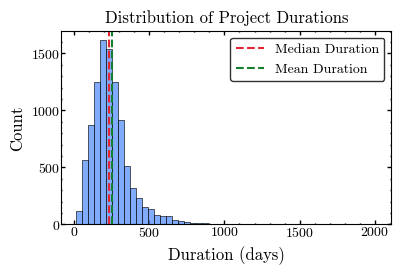

In [5]:
fig, ax = plt.subplots()

sns.histplot(formatted_data["DurationDays"].to_list(), bins=50, ax=ax)

ax.set_xlabel("Duration (days)")
ax.axvline(
    x=formatted_data["DurationDays"].median(),
    color=Color.RED.value,
    linestyle="--",
    label="Median Duration"
)
ax.axvline(
    x=formatted_data["DurationDays"].mean(),
    color=Color.GREEN.value,
    linestyle="--",
    label="Mean Duration"
)
ax.set_title("Distribution of Project Durations")
ax.legend()

Text(0.5, 1.0, 'Contract Cost vs Duration of Flood Control Projects')

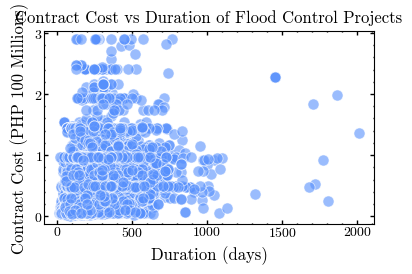

In [6]:
sns.scatterplot(
    data=formatted_data.to_pandas(),
    x="DurationDays",
    y="ContractCost",
    color=Color.BLUE.value,
    alpha=0.6
)
plt.xlabel("Duration (days)")
plt.ylabel("Contract Cost (PHP 100 Millions)")
plt.title("Contract Cost vs Duration of Flood Control Projects")

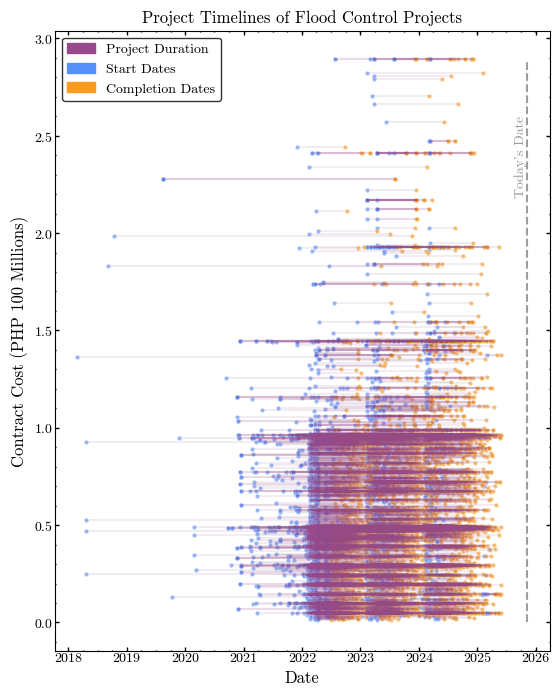

In [23]:
fig, ax = plt.subplots(figsize=(6, 8))

for row in formatted_data.iter_rows(named=True):
    start_date = row["StartDate"]
    completion_date = row["CompletionDateActual"]
    cost = row["ContractCost"]

    plt.plot(
        [start_date, completion_date],
        [cost, cost],
        color=Color.PURPLE.value,
        alpha=0.1,
    )

sns.scatterplot(
    data=formatted_data.sort("StartDate").to_pandas(),
    x="StartDate",
    y="ContractCost",
    ax=ax,
    alpha=0.6,
    s=10,
    label="Start Date",
)

sns.scatterplot(
    data=formatted_data.sort("StartDate").to_pandas(),
    x="CompletionDateActual",
    y="ContractCost",
    ax=ax,
    alpha=0.6,
    s=10,
    label="Completion Date",
)



todays_date = datetime.date.today()
plt.plot(
    [todays_date, todays_date],
    [0, formatted_data["ContractCost"].max()],
    color=Color.GRAY.value,
    linestyle="--",
)
ax.text(
    todays_date, formatted_data["ContractCost"].max() * 0.9,
    "Today's Date",
    rotation=90,
    color=Color.GRAY.value,
    va="top",
    ha="right",
)

plt.legend(
    title="Project Timelines",
    loc="upper left",
)
plt.xlabel("Date")
plt.ylabel("Contract Cost (PHP 100 Millions)")
plt.title("Project Timelines of Flood Control Projects")

from matplotlib.patches import Patch
plt.legend(handles=[Patch(color=Color.PURPLE.value, label="Project Duration"),
                    Patch(color=Color.BLUE.value, label="Start Dates"),
                    Patch(color=Color.ORANGE.value, label="Completion Dates")])

In [8]:
grouped_by_months = (
    formatted_data
    .with_columns([
        pl.col("StartDate").dt.truncate("1mo").alias("StartMonth"),
    ])
    .group_by("StartMonth")
    .agg([
        pl.len().alias("ProjectCount"),
        pl.col("ContractCost").median().alias("MedianContractCost"),
    ])
)
grouped_by_months

StartMonth,ProjectCount,MedianContractCost
date,u32,f64
2023-11-01,12,0.189378
2022-06-01,184,0.489977
2024-04-01,396,0.488514
2024-08-01,14,0.291715
2024-12-01,1,0.964944
…,…,…
2020-03-01,1,0.271539
2022-10-01,27,0.482496
2021-04-01,13,0.536371


In [9]:
grouped_by_months_end_date = (
    formatted_data
    .with_columns([
        pl.col("CompletionDateActual").dt.truncate("1mo").alias("EndMonth"),
    ])
    .group_by("EndMonth")
    .agg([
        pl.len().alias("ProjectCount"),
        pl.col("ContractCost").median().alias("MedianContractCost"),
    ])
)
grouped_by_months_end_date

EndMonth,ProjectCount,MedianContractCost
date,u32,f64
2024-04-01,235,0.672122
2023-12-01,538,0.723745
2024-08-01,295,0.488981
2024-12-01,263,0.692353
2023-11-01,420,0.512916
…,…,…
2024-02-01,219,0.72375
2023-01-01,244,0.49
2022-10-01,500,0.482575


Text(0.5, 1.0, 'Number of Flood Control Projects Started and Ended Over Time')

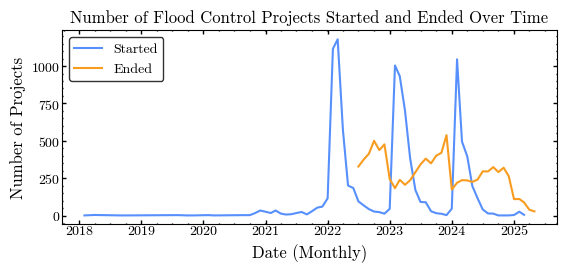

In [10]:
plt.figure(figsize=(6, 2.5))
sns.lineplot(
    data=grouped_by_months.to_pandas(),
    x="StartMonth",
    y="ProjectCount",
    label="Started",
)

sns.lineplot(
    data=grouped_by_months_end_date.to_pandas(),
    x="EndMonth",
    y="ProjectCount",
    label="Ended",
)
plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Projects")
plt.title("Number of Flood Control Projects Started and Ended Over Time")